In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install imbalanced-learn
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 4.7 MB/s eta 0:00:00


**Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
# Separate features and target variable
data = pd.read_csv('data.csv')
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']


<ipython-input-5-496501e030d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


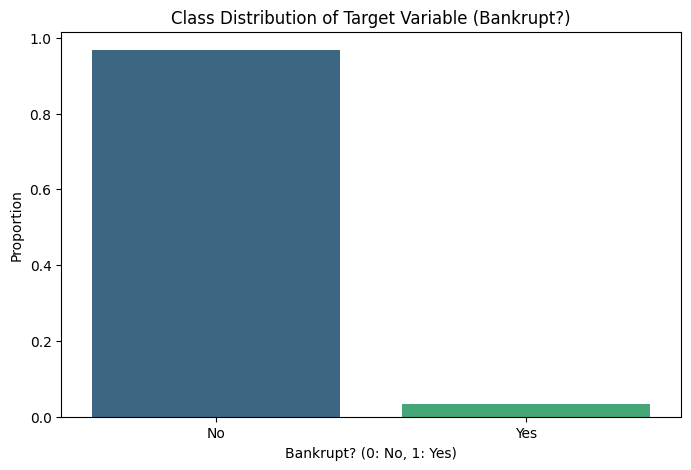

(0,
 Bankrupt?
 0    0.967737
 1    0.032263
 Name: proportion, dtype: float64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check for missing values
missing_values = data.isnull().sum().sum()

# 2. Analyze class distribution for the target variable 'Bankrupt?'
class_distribution = data['Bankrupt?'].value_counts(normalize=True)

# 3. Plot the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Class Distribution of Target Variable (Bankrupt?)')
plt.xlabel('Bankrupt? (0: No, 1: Yes)')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Output the missing values count and class distribution
missing_values, class_distribution


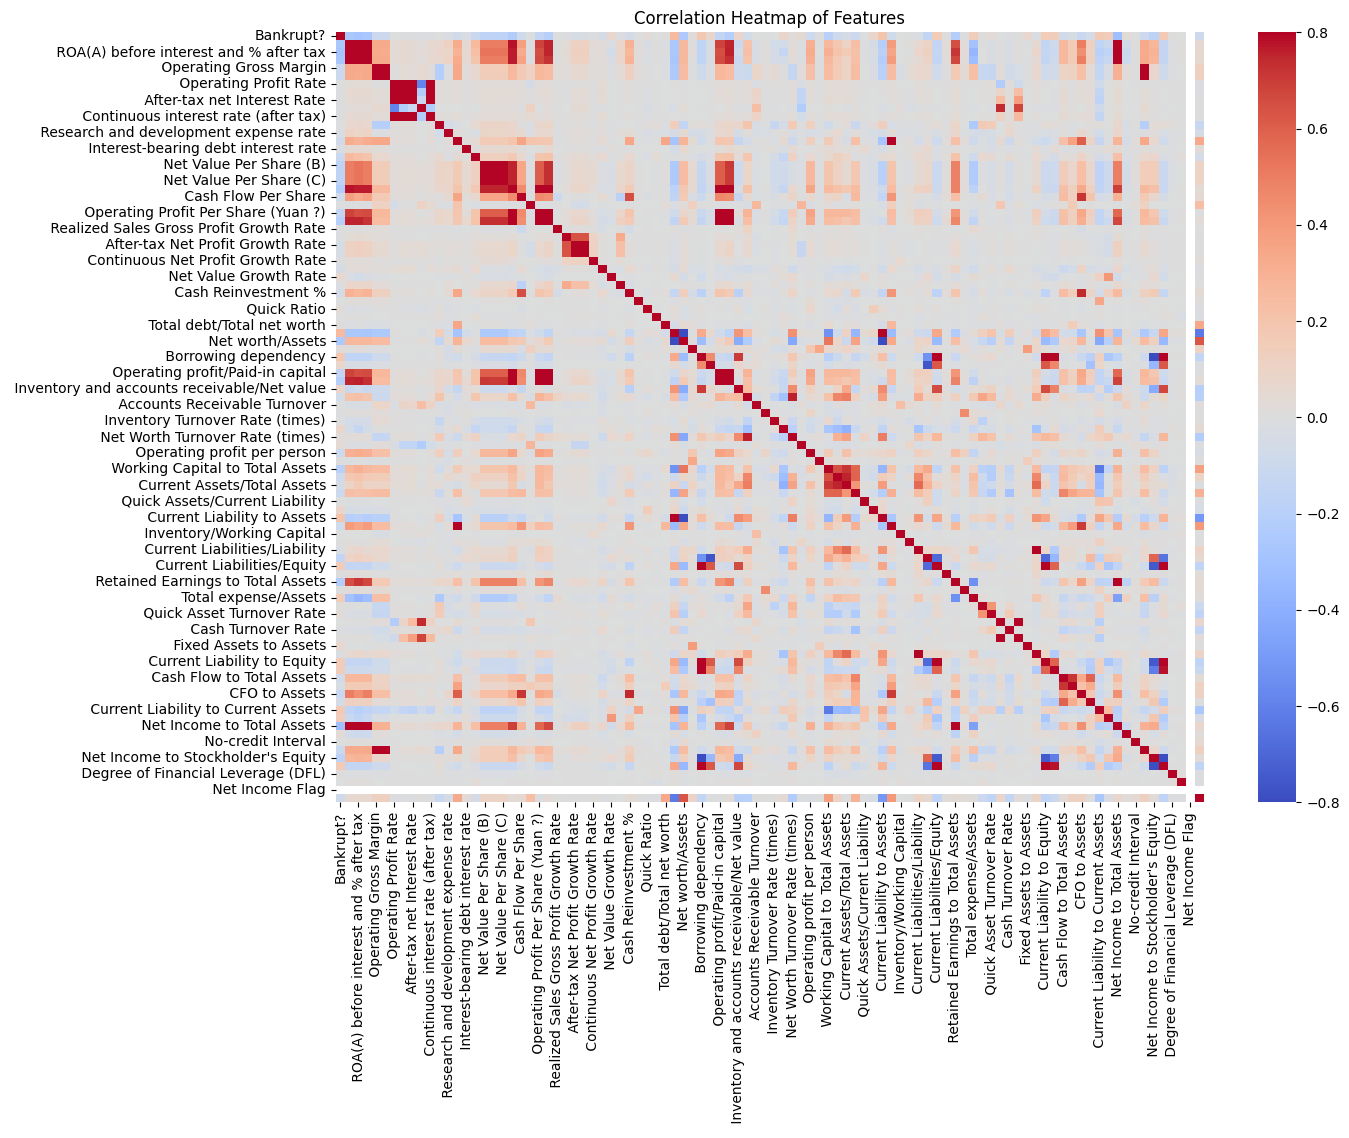

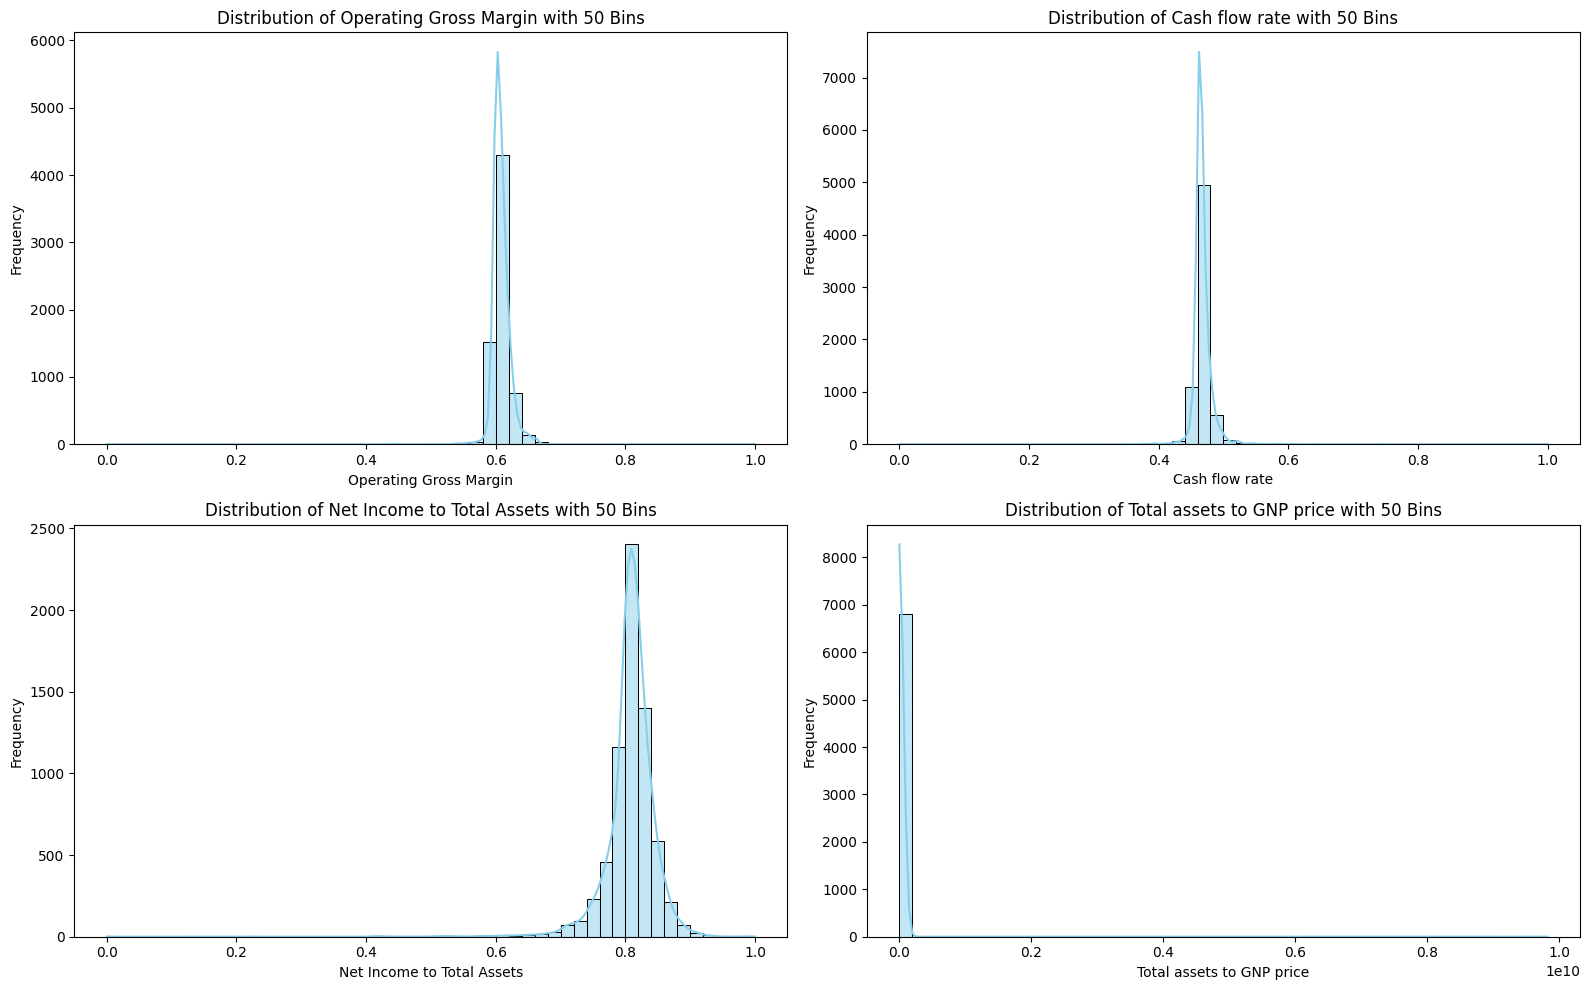

<ipython-input-6-ecf54acf6a66>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Bankrupt?', y=' Operating Gross Margin', palette='Set2')


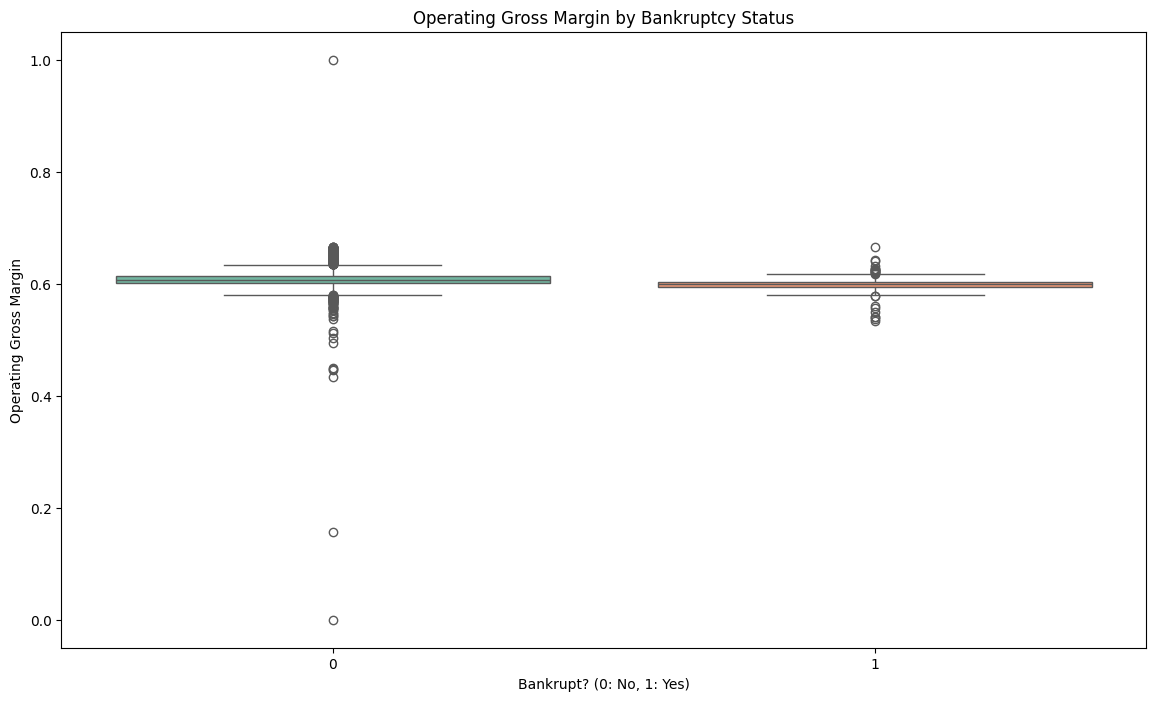

In [ ]:
# Additional visualizations for the dataset

# 1. Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), cmap='coolwarm', vmax=0.8, vmin=-0.8, center=0, annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

# 2. Distribution of a few key financial features
key_features = [' Operating Gross Margin', ' Cash flow rate', ' Net Income to Total Assets', ' Total assets to GNP price']
# Using a smaller number of bins for histogram plots to avoid memory issues
bins = 50  # Reduced number of bins

# Plot histograms for key financial features with a limited number of bins
plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], bins=bins, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature.strip()} with {bins} Bins')
    plt.xlabel(feature.strip())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 3. Boxplot to compare key financial metrics between bankrupt and non-bankrupt companies
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Bankrupt?', y=' Operating Gross Margin', palette='Set2')
plt.title('Operating Gross Margin by Bankruptcy Status')
plt.xlabel('Bankrupt? (0: No, 1: Yes)')
plt.ylabel('Operating Gross Margin')
plt.show()


In [ ]:
# Step 3: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

<ipython-input-8-5cb1a574c14e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_balanced.value_counts().index, y=y_train_balanced.value_counts().values, palette='viridis')


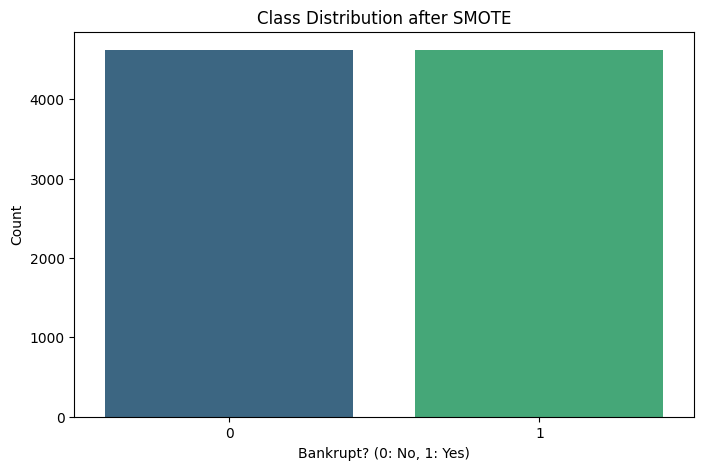

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. Class Distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.barplot(x=y_train_balanced.value_counts().index, y=y_train_balanced.value_counts().values, palette='viridis')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Bankrupt? (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()




**Logistic Regression**

Logistic Regression Accuracy: 0.8973607038123167
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1980
           1       0.19      0.68      0.30        66

    accuracy                           0.90      2046
   macro avg       0.59      0.79      0.62      2046
weighted avg       0.96      0.90      0.92      2046



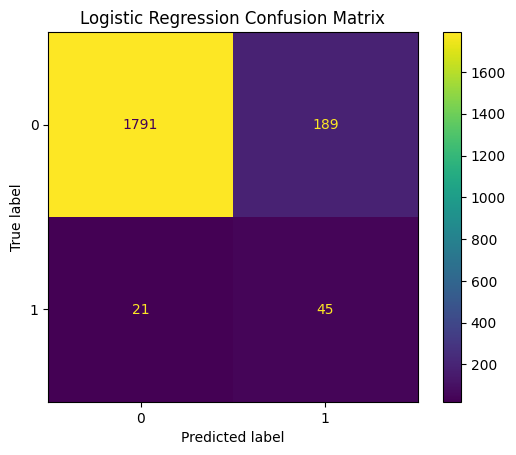

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Initialize the basic Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Step 2: Train the Logistic Regression model
log_reg_model.fit(X_train_balanced_scaled, y_train_balanced)

# Step 3: Make predictions using the trained model
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy)
print(classification_report(y_test, y_pred_log_reg))

# Step 5: Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_scaled, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()



**XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Initialize the XGBoost model without use_label_encoder
xgb_model = XGBClassifier(eval_metric='logloss')

# Train the XGBoost model
xgb_model.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.9652981427174976


**XGBoost Visualization**

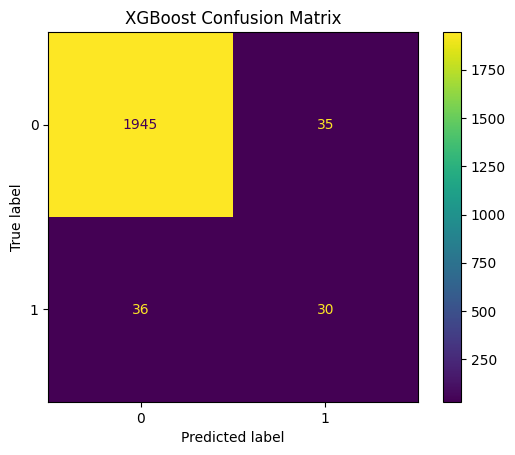

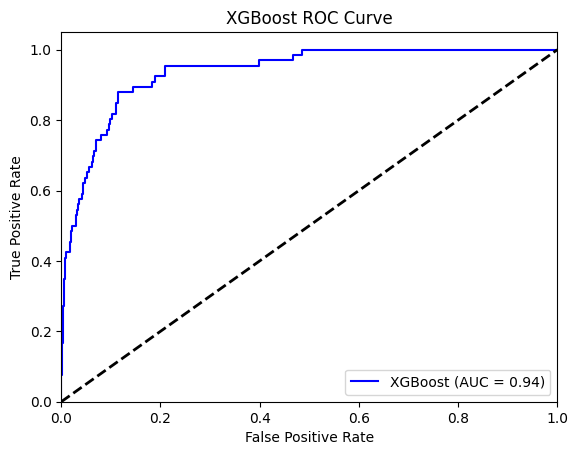

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.46      0.45      0.46        66

    accuracy                           0.97      2046
   macro avg       0.72      0.72      0.72      2046
weighted avg       0.97      0.97      0.97      2046



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, classification_report

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test)
plt.title("XGBoost Confusion Matrix")
plt.show()

# ROC Curve
# For XGBoost, predict_proba gives the probability of class 0 and class 1, we take probability of class 1
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate the FPR and TPR for the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Compute AUC (Area Under the Curve)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Optional: Print Classification Report for more insights
print(classification_report(y_test, xgb_model.predict(X_test_scaled)))



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Step 1: Initialize the SVM model
svm_model = SVC(kernel='rbf', probability=True)

# Step 2: Train the SVM model
svm_model.fit(X_train_balanced_scaled, y_train_balanced)

# Step 3: Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 4: Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)



SVM Accuracy: 0.9242424242424242


**Support Vector Machine Visualization**

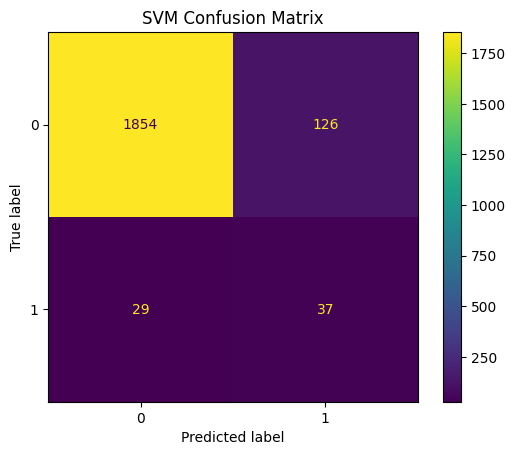

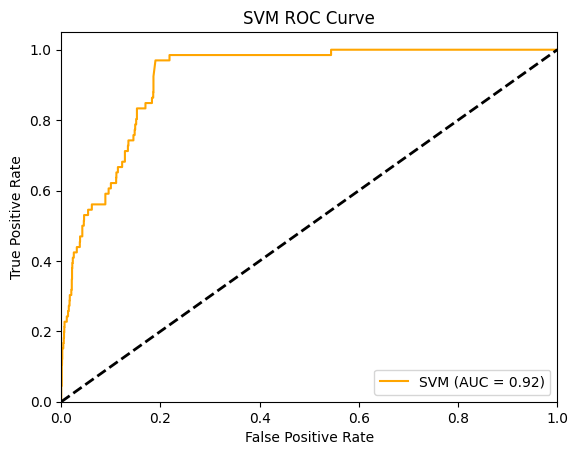

In [ ]:
# Confusion Matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve for SVM
# Ensure that `probability=True` was set while initializing the SVM model
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1

# Compute False Positive Rate and True Positive Rate
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

# Compute AUC (Area Under the Curve)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()



**Classification By Deep Neural Network**

Epoch 1/20
289/289 [==============================] - 2s 3ms/step - loss: 1.1689 - accuracy: 0.8881 - val_loss: 4301892.0000 - val_accuracy: 0.9130 - lr: 0.0010
Epoch 2/20
289/289 [==============================] - 1s 3ms/step - loss: 0.4211 - accuracy: 0.9216 - val_loss: 9208825.0000 - val_accuracy: 0.8964 - lr: 0.0010
Epoch 3/20
289/289 [==============================] - 1s 3ms/step - loss: 0.3004 - accuracy: 0.9294 - val_loss: 3634313.7500 - val_accuracy: 0.9189 - lr: 5.0000e-04
Epoch 4/20
289/289 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9327 - val_loss: 4344069.5000 - val_accuracy: 0.9071 - lr: 5.0000e-04
Epoch 5/20
289/289 [==============================] - 1s 2ms/step - loss: 0.2477 - accuracy: 0.9373 - val_loss: 1944721.2500 - val_accuracy: 0.9198 - lr: 2.5000e-04
Epoch 6/20
289/289 [==============================] - 1s 2ms/step - loss: 0.2396 - accuracy: 0.9431 - val_loss: 198670.1094 - val_accuracy: 0.9218 - lr: 2.5000e-04
Epoch 7/20
289/289 

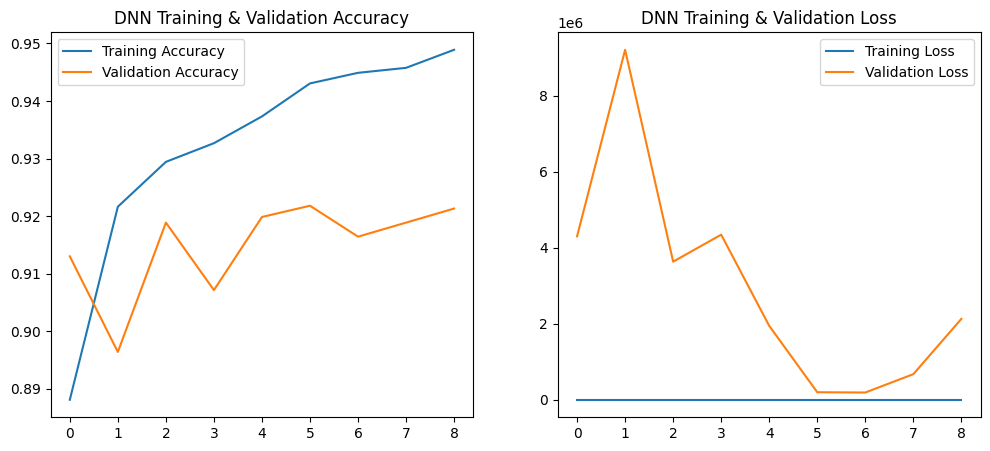

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the DNN model with increased regularization
dnn_model = Sequential([
    Dense(128, input_shape=(X_train_balanced_scaled.shape[1],), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.4),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.4),  # Increased dropout rate
    Dense(1, activation='sigmoid')
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback with patience reduced to 2
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.0001)

# Train the model with both early stopping and learning rate reduction
history = dnn_model.fit(X_train_balanced_scaled, y_train_balanced, epochs=20, batch_size=32,
                        validation_data=(X_test_scaled, y_test),
                        callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = dnn_model.evaluate(X_test_scaled, y_test)
print("DNN Accuracy:", accuracy)

# Plotting the training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DNN Training & Validation Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN Training & Validation Loss')
plt.legend()

plt.show()


**Confusion Matrix For DNN**

64/64 [==============================] - 0s 1ms/step


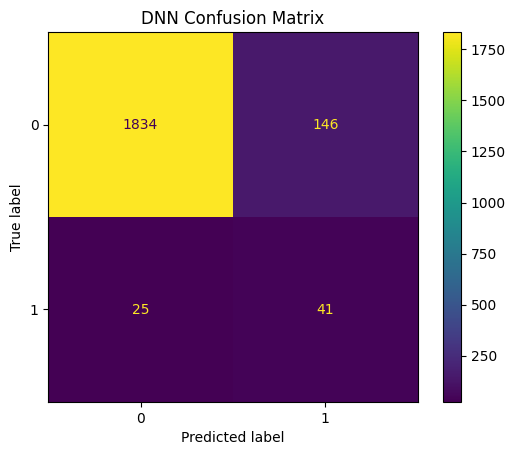

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Get predictions from the DNN model
y_pred_dnn = (dnn_model.predict(X_test_scaled) > 0.5).astype("int32")

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dnn)
plt.title("DNN Confusion Matrix")
plt.show()



**ROC Curve for DNN**

64/64 [==============================] - 0s 1ms/step


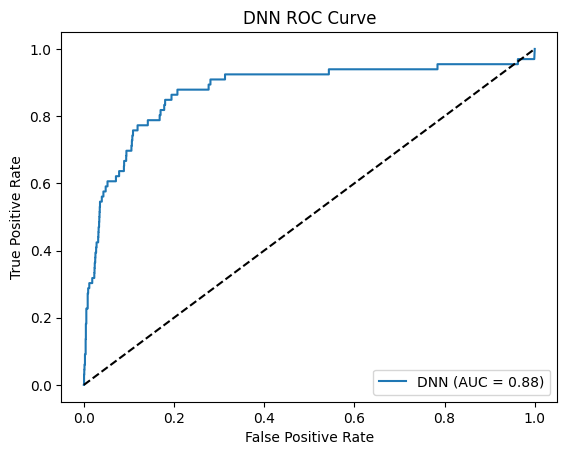

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_pred_proba_dnn = dnn_model.predict(X_test_scaled).ravel()

# Compute ROC curve and AUC
fpr_dnn, tpr_dnn, _ = roc_curve(y_test, y_pred_proba_dnn)
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dnn, tpr_dnn, label=f'DNN (AUC = {roc_auc_dnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNN ROC Curve')
plt.legend(loc="lower right")
plt.show()
